In [6]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [27]:
select = SelectFromModel(
    RandomForestClassifier(n_estimators=100, random_state=42), threshold="median"
    # SelecFromModelクラスは教師あり学習モデルで得られた特徴量の重要性が、指定したthresholdより大きければ採用する
)

In [28]:
cancer = load_breast_cancer()
rng = np.random.default_rng(seed=42)

# noiseを作る
noise = rng.normal(size=(len(cancer.data), 50))

# noiseを付け足す
# hstackは新しい列を作る, pd.concat(axis=1)と同じ
X_w_noise = np.hstack([cancer["data"], noise])


X_train, X_test, y_train, y_test = train_test_split(X_w_noise, cancer["target"], random_state=0, test_size=0.5)

select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print(X_train.shape)
print(X_train_l1.shape)

(284, 80)
(284, 40)


Text(0.5, 0, 'Sample, index')

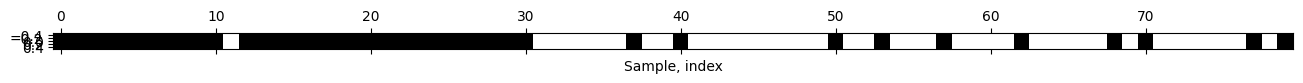

In [29]:
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap="gray_r")
plt.xlabel("Sample, index")

In [30]:
X_test_l1 = select.transform(X_test)
score = LogisticRegression(max_iter=2765).fit(X_train_l1, y_train).score(X_test_l1, y_test)
print(score)

0.9438596491228071
